In [13]:
import numpy as np
import pandas as pd
import requests
import os, glob
import psutil

<h1>Functions that we work with</h1>

In [55]:
def reader(file):
    data = pd.read_csv(file)
    data['country']=[file[:2] for f in data['title']]
    return(data)

def current_dir():
    return(os.getcwd())

def get_username():
    return psutil.Process().username().split('\\')[1]

<h1>Check to see if current directory matches where files are stored</h1>

In [56]:
print(current_dir())

C:\Users\paulm\Desktop\homework\project


<h2>Getting all CSV files for the Data</h2>

In [61]:
os.chdir(current_dir())

li = []
sizes = 0
for file in glob.glob("*.csv", recursive = True):
    li.append(reader(file))
    print(file,'-----',reader(file).size)
    sizes += reader(file).size
print("total size for top 30 videos in 11 countries is "+str(sizes))
result = pd.concat(li, axis=0, ignore_index=True)

BR_youtube_trending_data.csv ----- 686681
CA_youtube_trending_data.csv ----- 685865
DE_youtube_trending_data.csv ----- 685899
FR_youtube_trending_data.csv ----- 686698
GB_youtube_trending_data.csv ----- 686715
IN_youtube_trending_data.csv ----- 642464
JP_youtube_trending_data.csv ----- 686732
KR_youtube_trending_data.csv ----- 635018
MX_youtube_trending_data.csv ----- 683383
RU_youtube_trending_data.csv ----- 684369
US_youtube_trending_data.csv ----- 686664
total size for top 30 videos in 11 countries is 7450488


In [63]:
for c in result.columns:
    print(c)

video_id
title
publishedAt
channelId
channelTitle
categoryId
trending_date
tags
view_count
likes
dislikes
comment_count
thumbnail_link
comments_disabled
ratings_disabled
description
country


In [64]:
result.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,438264.000000,4.382640e+05,4.382640e+05,4.382640e+05,4.382640e+05
mean,19.027926,1.709070e+06,1.056051e+05,2.895660e+03,1.129388e+04
std,7.068291,5.609668e+06,4.051994e+05,5.631809e+04,1.090949e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.131200e+05,7.463000e+03,1.690000e+02,5.970000e+02
50%,22.000000,5.318070e+05,2.253400e+04,4.750000e+02,1.713000e+03
75%,24.000000,1.371926e+06,7.298375e+04,1.486000e+03,5.202000e+03
max,29.000000,2.623193e+08,1.625479e+07,1.234147e+07,6.303708e+06


In [65]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438264 entries, 0 to 438263
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           438264 non-null  object
 1   title              438264 non-null  object
 2   publishedAt        438264 non-null  object
 3   channelId          438264 non-null  object
 4   channelTitle       438263 non-null  object
 5   categoryId         438264 non-null  int64 
 6   trending_date      438264 non-null  object
 7   tags               438264 non-null  object
 8   view_count         438264 non-null  int64 
 9   likes              438264 non-null  int64 
 10  dislikes           438264 non-null  int64 
 11  comment_count      438264 non-null  int64 
 12  thumbnail_link     438264 non-null  object
 13  comments_disabled  438264 non-null  bool  
 14  ratings_disabled   438264 non-null  bool  
 15  description        432994 non-null  object
 16  country            4

In [66]:
new_columns=['categoryId','view_count','likes','dislikes','comment_count']
analyze=result[new_columns]
analyze

,categoryId,view_count,likes,dislikes,comment_count
0,22,263835,85095,487,4500
1,10,6000070,714310,15176,31040
2,22,2296748,39761,5484,0
3,20,300510,46222,242,2748
4,23,327235,22059,3972,2751
...,...,...,...,...,...
438259,20,453545,15481,379,2289
438260,20,2349296,62948,11658,20066
438261,24,2236533,189768,922,14878
438262,22,841876,54405,573,9090


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219BE6CAC88>,
      dtype=object)

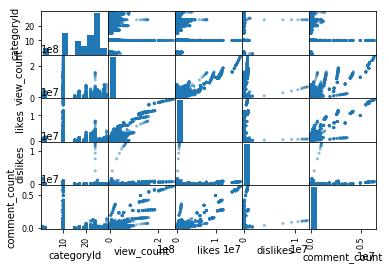

In [68]:
pd.plotting.scatter_matrix(analyze)